defaultdict(<class 'list'>, {'tr': [57.0, 59.0, 55.0, 53.0, 53.0, 53.0, 53.0], 'tf': [43.0, 45.0, 47.0, 42.0, 42.0, 42.0, 42.0], 'duty': [49.2, 49.3, 50.1, 52.0, 52.0, 52.0, 52.0]})


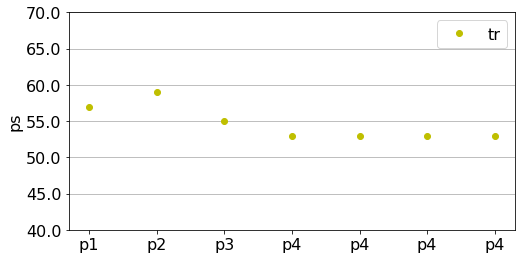

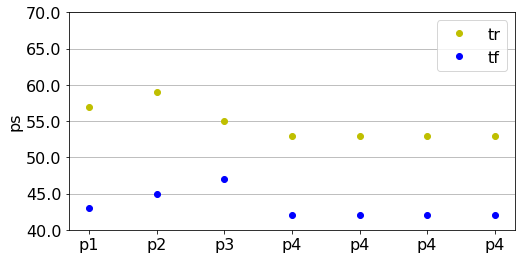

In [1]:
import csv
from collections import OrderedDict, defaultdict

import matplotlib.pyplot as plt

import pandas as pd


class DataFrameToPng:
    def __init__(self, fontsize):
        self.fontsize = fontsize

    def make_graph(self, df, ylim, xlabel="", ylabel="", style=["bo"]):
        self.df = df

        fig = plt.figure(figsize=(8, 4))
        ax = fig.add_subplot(1, 1, 1)
        ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.1f"))
        ax.set_ylabel(ylabel, fontsize=self.fontsize)
        ax.set_xlabel(xlabel, fontsize=self.fontsize)
        self.df.plot(ax=ax, ylim=ylim, style=style, legend=True, fontsize=self.fontsize)
        ax.legend(fontsize=self.fontsize)
        ax.grid(axis="y")

    def save_graph(self, filename):
        plt.savefig(filename + ".png")


if __name__ == "__main__":
    index = []
    data = defaultdict(list)
    with open("data.csv") as f:
        for row in csv.reader(f):
            index.append(row[0])
            for i in range(1, len(row), 2):
                data[row[i]].append(float(row[i + 1]))

    print(data)

    df_tr = pd.DataFrame(data["tr"], index=index, columns=["tr"])

    df_to_png = DataFrameToPng(16)
    df_to_png.make_graph(df=df_tr, ylim=[40, 70], ylabel="ps", style=["yo"])
    df_to_png.save_graph(filename="xyz")

    data_trtf = OrderedDict()
    data_trtf["tr"] = data["tr"]
    data_trtf["tf"] = data["tf"]
    df_trtf = pd.DataFrame(data_trtf, index=index, columns=["tr", "tf"])
    df_to_png.make_graph(df=df_trtf, ylim=[40, 70], ylabel="ps", style=["yo", "bo"])
    df_to_png.save_graph(filename="trtf")

,tr
p1,57.0
p2,59.0
p3,55.0
p4,53.0
p4,53.0
p4,53.0
p4,53.0
